In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('questions.csv')

In [15]:
df.shape

(404351, 6)

In [16]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [17]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
232131,232131,457376,457377,What is the role of students in an education?,What is the role of society in education?,0
262758,262758,517015,517016,What is the best first car?,What would be a good first car?,1
226864,226864,447113,447114,How do I skip the login page after downloading...,How can I download videos from this page?,0
277013,277013,544650,544651,How are guitar chords made?,How are guitar chords made? (in physics),0
372374,372374,728627,728628,What does it mean to you to live life to the f...,Why do we not live life to its fullest?,0
205546,205546,405518,405519,Did Megalodons have any predators?,Was the Megalodon the top predator of its time?,0
42607,42607,84860,84861,Where happened after things go into black hole?,What happens to things that go into black holes?,1
345084,345084,148338,676270,What is the difference between Quora and Stack...,What is the difference between StackExchange a...,1
318314,318314,624570,624571,What are the most important apps for civil eng...,Which is the best app for civil engineering?,1
279307,279307,146907,549104,How does the vvison.com work?,How grammarly.com work?,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


<Axes: >

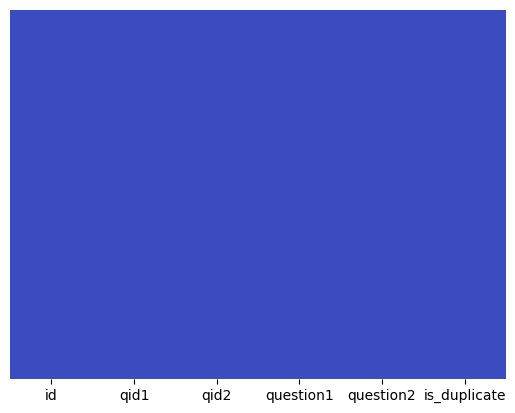

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [20]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [21]:

df.head()


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

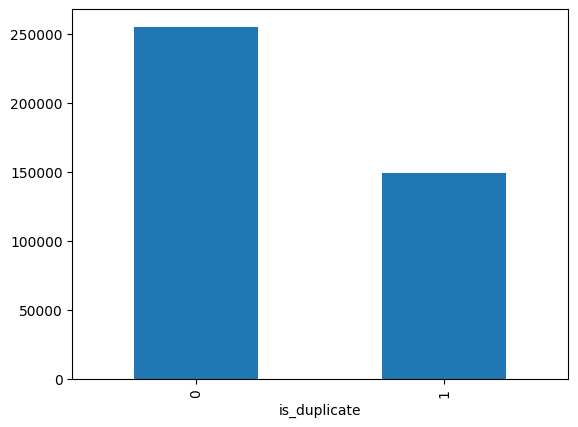

In [23]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [24]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


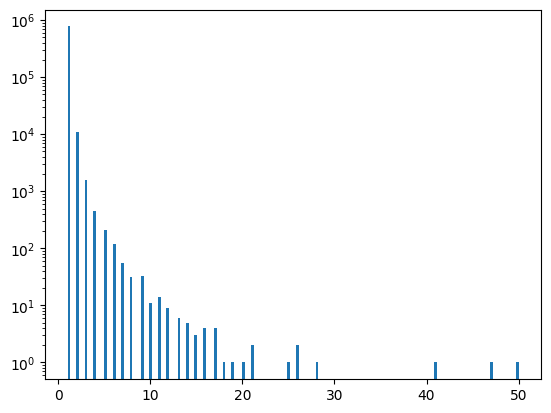

In [25]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [26]:
new_df = df.sample(30000)

In [27]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [37]:
new_df = new_df.dropna()


In [38]:
 new_df.duplicated().sum()

0

In [39]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
146500,If a modern person; went back a couple of mill...,If a modern person; went back a couple million...
151848,How can we write a essay?,How do I write great essays?
218892,Why do black holes exist?,What are black holes? Do they really exist? Ho...
350723,What's the meaning of living?,"What is the meaning of a ""Living Being""?"
284247,What are common early career problems for peop...,What are common early career problems for peop...


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [41]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(29999, 6000)

In [46]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
146500,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
151848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [49]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
146500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
151848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
218892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
350723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.739

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7271666666666666

# after some feature engineering

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
146500,146500,289876,289877,If a modern person; went back a couple of mill...,If a modern person; went back a couple million...,1,108,105.0
151848,151848,300368,300369,How can we write a essay?,How do I write great essays?,1,25,28.0
218892,218892,431558,431559,Why do black holes exist?,What are black holes? Do they really exist? Ho...,1,25,64.0
350723,350723,687082,687083,What's the meaning of living?,"What is the meaning of a ""Living Being""?",0,29,40.0
284247,284247,558672,558673,What are common early career problems for peop...,What are common early career problems for peop...,0,72,74.0


is_duplicate
0    18977
1    11022
Name: count, dtype: int64
is_duplicate
0    63.258775
1    36.741225
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

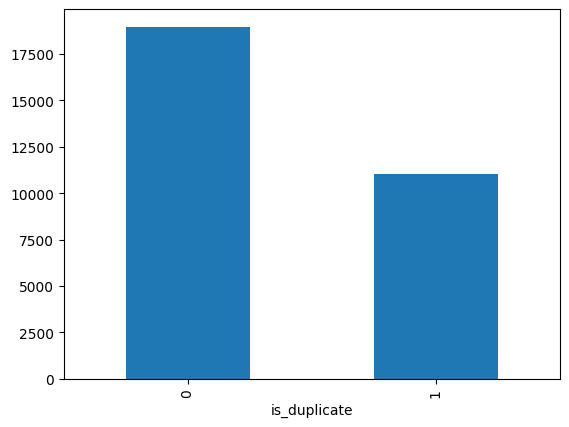

In [54]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [55]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 59804
Number of questions getting repeated 171


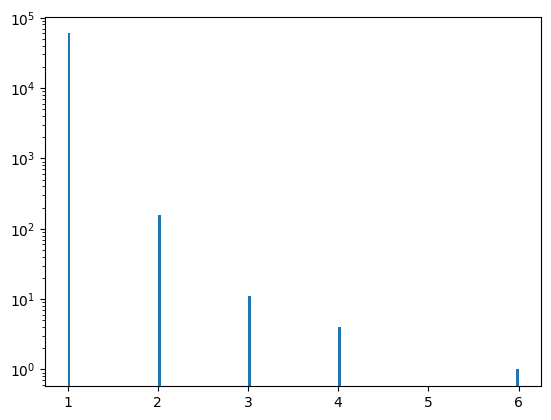

In [56]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [57]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
146500,146500,289876,289877,If a modern person; went back a couple of mill...,If a modern person; went back a couple million...,1,108,105.0,22,21
151848,151848,300368,300369,How can we write a essay?,How do I write great essays?,1,25,28.0,6,6
218892,218892,431558,431559,Why do black holes exist?,What are black holes? Do they really exist? Ho...,1,25,64.0,5,12
350723,350723,687082,687083,What's the meaning of living?,"What is the meaning of a ""Living Being""?",0,29,40.0,5,8
284247,284247,558672,558673,What are common early career problems for peop...,What are common early career problems for peop...,0,72,74.0,12,12


In [58]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [59]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
146500,146500,289876,289877,If a modern person; went back a couple of mill...,If a modern person; went back a couple million...,1,108,105.0,22,21,20
151848,151848,300368,300369,How can we write a essay?,How do I write great essays?,1,25,28.0,6,6,2
218892,218892,431558,431559,Why do black holes exist?,What are black holes? Do they really exist? Ho...,1,25,64.0,5,12,3
350723,350723,687082,687083,What's the meaning of living?,"What is the meaning of a ""Living Being""?",0,29,40.0,5,8,3
284247,284247,558672,558673,What are common early career problems for peop...,What are common early career problems for peop...,0,72,74.0,12,12,11


In [60]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [61]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
146500,146500,289876,289877,If a modern person; went back a couple of mill...,If a modern person; went back a couple million...,1,108,105.0,22,21,20,40
151848,151848,300368,300369,How can we write a essay?,How do I write great essays?,1,25,28.0,6,6,2,12
218892,218892,431558,431559,Why do black holes exist?,What are black holes? Do they really exist? Ho...,1,25,64.0,5,12,3,15
350723,350723,687082,687083,What's the meaning of living?,"What is the meaning of a ""Living Being""?",0,29,40.0,5,8,3,13
284247,284247,558672,558673,What are common early career problems for peop...,What are common early career problems for peop...,0,72,74.0,12,12,11,24


In [62]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
146500,146500,289876,289877,If a modern person; went back a couple of mill...,If a modern person; went back a couple million...,1,108,105.0,22,21,20,40,0.50
151848,151848,300368,300369,How can we write a essay?,How do I write great essays?,1,25,28.0,6,6,2,12,0.17
218892,218892,431558,431559,Why do black holes exist?,What are black holes? Do they really exist? Ho...,1,25,64.0,5,12,3,15,0.20
350723,350723,687082,687083,What's the meaning of living?,"What is the meaning of a ""Living Being""?",0,29,40.0,5,8,3,13,0.23
284247,284247,558672,558673,What are common early career problems for peop...,What are common early career problems for peop...,0,72,74.0,12,12,11,24,0.46


minimum characters 1
maximum characters 345
average num of characters 59


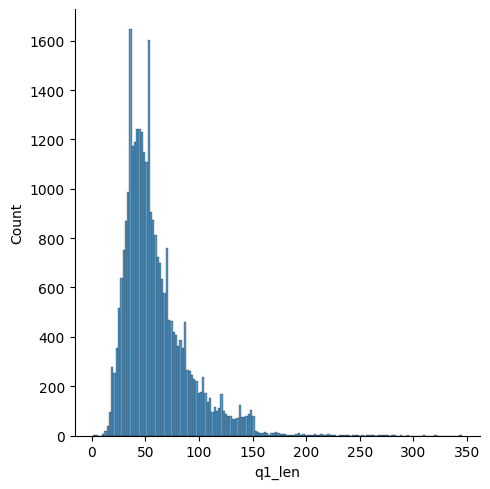

In [63]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 7.0
maximum characters 1151.0
average num of characters 60


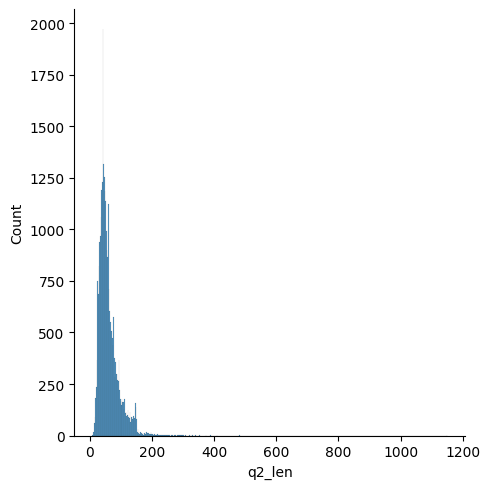

In [64]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 63
average num of words 10


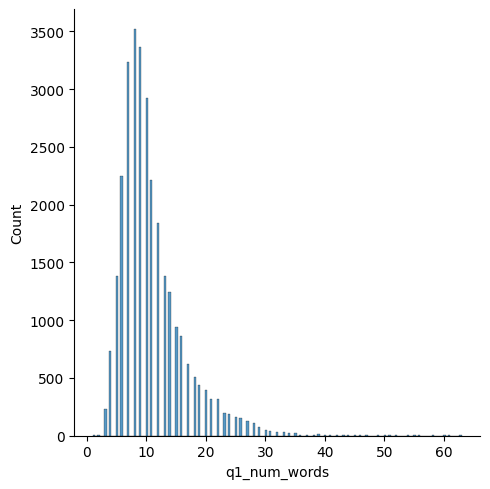

In [65]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 2
maximum words 237
average num of words 11


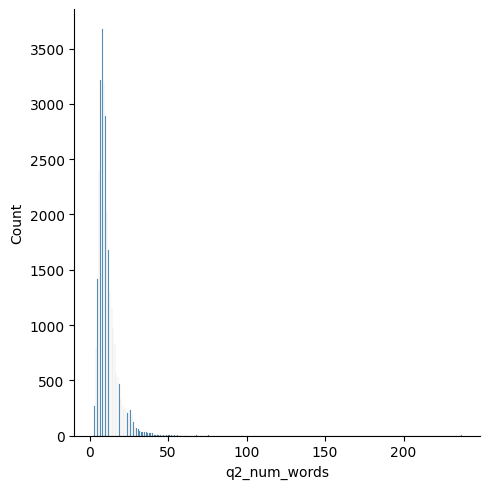

In [66]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

C:\Users\deepa\AppData\Local\Temp\ipykernel_8816\847226910.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
C:\Users\deepa\AppData\Local\Temp\ipykernel_8816\847226910.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

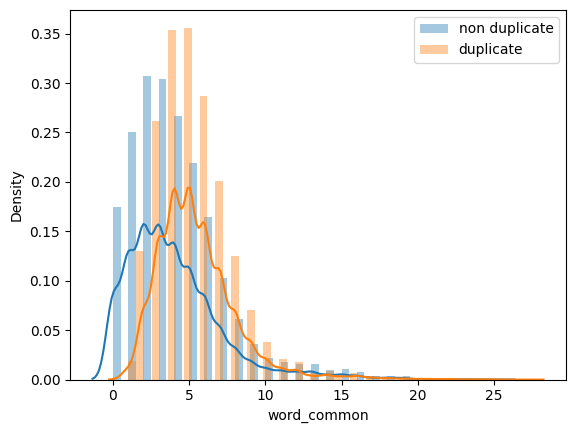

In [67]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_8816\590203201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
C:\Users\deepa\AppData\Local\Temp\ipykernel_8816\590203201.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n

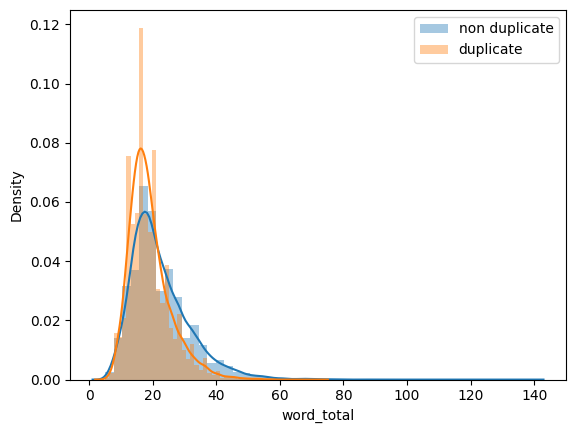

In [68]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_8816\2292000331.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
C:\Users\deepa\AppData\Local\Temp\ipykernel_8816\2292000331.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

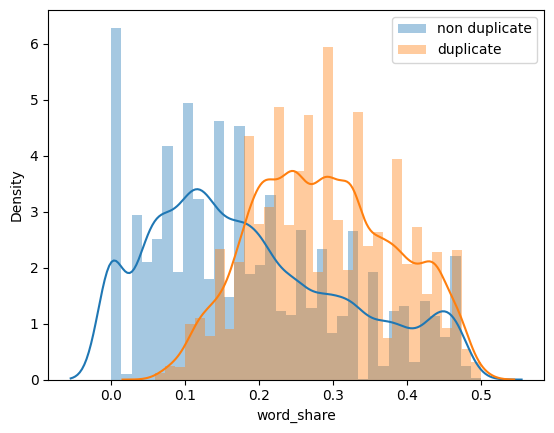

In [69]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [70]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
146500,If a modern person; went back a couple of mill...,If a modern person; went back a couple million...
151848,How can we write a essay?,How do I write great essays?
218892,Why do black holes exist?,What are black holes? Do they really exist? Ho...
350723,What's the meaning of living?,"What is the meaning of a ""Living Being""?"
284247,What are common early career problems for peop...,What are common early career problems for peop...


In [71]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(29999, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
146500,1,108,105.0,22,21,20,40,0.50
151848,1,25,28.0,6,6,2,12,0.17
218892,1,25,64.0,5,12,3,15,0.20
350723,0,29,40.0,5,8,3,13,0.23
284247,0,72,74.0,12,12,11,24,0.46


In [72]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [73]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(29999, 6000)

In [74]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(29999, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
146500,1,108,105.0,22,21,20,40,0.50,0,0,...,1,0,0,0,0,0,0,0,0,0
151848,1,25,28.0,6,6,2,12,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
218892,1,25,64.0,5,12,3,15,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
350723,0,29,40.0,5,8,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0
284247,0,72,74.0,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7666666666666667

In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7655

# after Advance Feature engineering